In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from models.VarAe import VarEncoder

In [2]:
plt.style.use("dark_background")

In [3]:
test_data_path = "C:\\Users\\1\\Desktop\\PersonalFriendProject\\human_emotions\\test"
train_data_path = "C:\\Users\\1\\Desktop\\PersonalFriendProject\\human_emotions\\train"

In [4]:
generator_object = ImageDataGenerator()

    

In [5]:
batch_size = 32
target_shape = (36, 36, 3)

train_generator = generator_object.flow_from_directory(
    directory=train_data_path,
    target_size=target_shape[:-1],
    batch_size=batch_size
)

test_generator = generator_object.flow_from_directory(
    directory=test_data_path,
    target_size=target_shape[:-1],
    batch_size=batch_size
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
max_lenght = 2000
curent_lenght = 0

train_tensor_list = []
train_labels_list = []

test_tensor_list = []
test_labels_list = []

while curent_lenght < max_lenght:

    train_sample = next(train_generator)
    test_sample = next(test_generator)

    train_tensor_list.append(train_sample[0])
    train_labels_list.append(train_sample[1])
    test_tensor_list.append(train_sample[0])
    test_labels_list.append(train_sample[1])
    
    curent_lenght += batch_size




In [7]:
train_tensor = np.asarray(train_tensor_list[0])
test_tensor = np.asarray(test_tensor_list[0])
train_labels = np.asarray(train_labels_list[0])
test_labels = np.asarray(test_labels_list[0])

for sample_n in range(1, len(train_tensor_list)):

    train_tensor = np.concatenate((train_tensor, train_tensor_list[sample_n]), axis=0)
    test_tensor = np.concatenate((test_tensor, test_tensor_list[sample_n]), axis=0)
    train_labels = np.concatenate((train_labels, train_labels_list[sample_n]), axis=0)
    train_labels = np.concatenate((test_labels, test_labels_list[sample_n]), axis=0)

print(train_tensor.shape)
print(test_tensor.shape)
print(train_labels.shape)
print(test_labels.shape)
  

(2016, 36, 36, 3)
(2016, 36, 36, 3)
(64, 7)
(32, 7)


In [8]:
train_tensor = train_tensor / 255.0
test_tensor = test_tensor / 255.0

train_tensor_std = (train_tensor - np.mean(train_tensor)) / np.std(train_tensor)
test_tensor_std = (test_tensor - np.mean(test_tensor)) / np.std(test_tensor)

train_tensor_std = train_tensor_std[:1000]
test_tensor_std = test_tensor_std[:1000]


In [9]:
def show_samples(samples_number, data_tensor):
    
    samples_number_sq = int(np.sqrt(samples_number))
    fig, axis = plt.subplots()
    show_tensor = np.zeros((samples_number_sq * target_shape[0], samples_number_sq * target_shape[1], target_shape[-1]))

    sample_number = 0
    for i in range(samples_number_sq):
        for j in range(samples_number_sq):
            
            show_tensor[i * target_shape[0]: (i + 1) * target_shape[0],
                        j * target_shape[0]: (j + 1) * target_shape[1]] = data_tensor[sample_number]
            sample_number += 1
    
    axis.imshow(show_tensor)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


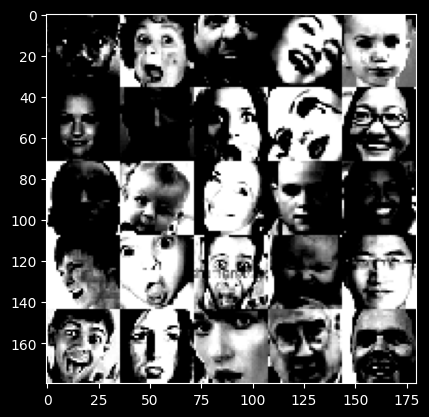

In [10]:
show_samples(samples_number=25, data_tensor=train_tensor_std)

In [11]:
params_json = {
    "input_shape": target_shape,
    "hiden_dim": 2,
    "encoder_out_activations": "tanh",
    "encoder_conv_filters": [32, 32, 64, 64],
    "encoder_conv_kernel_size": [3, 3, 3, 3],
    "encoder_conv_strides": [1, 2, 2, 1],
    "encoder_conv_padding": ["same", "same", "same", "same"],
    "encoder_conv_activations": ["linear", "linear", "linear", "linear"],
    "encoder_conv_dropout": [0.56, 0.56, 0.56, 0.56],
    "encoder_dense_units": [32, 32, 64, 64],
    "encoder_dense_dropout_rates": [0.56, 0.56, 0.56, 0.56],
    "encoder_dense_activations": ["linear", "linear", "linear", "linear"],

    "decoder_conv_filters": [32, 32, 64, 64],
    "decoder_conv_kernel_size": [3, 3, 3, 3],
    "decoder_conv_strides": [1, 2, 2, 1],
    "decoder_conv_padding": ["same", "same", "same", "same"],
    "decoder_conv_activations": ["linear", "linear", "linear", "linear"],
    "decoder_conv_dropout": [0.56, 0.56, 0.56, 0.56],
    "decoder_out_activations": "tanh"

}
Ae_model = VarEncoder(params_json=params_json)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


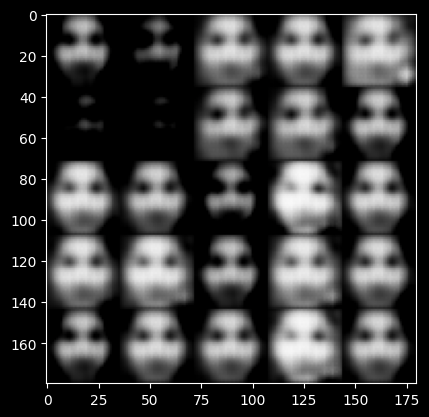

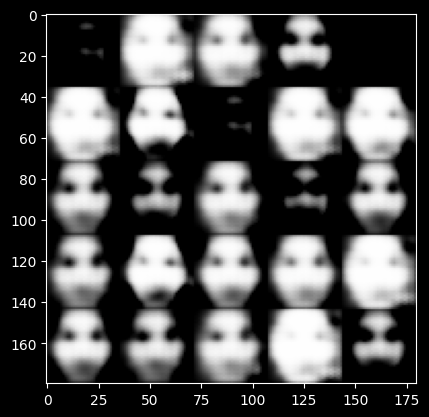

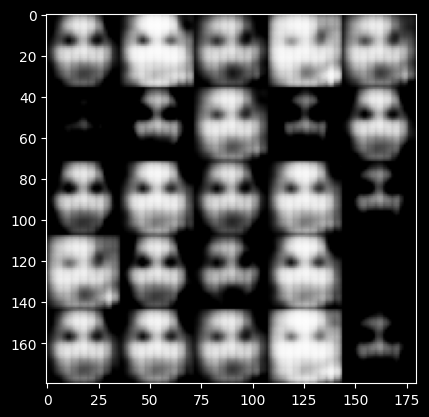

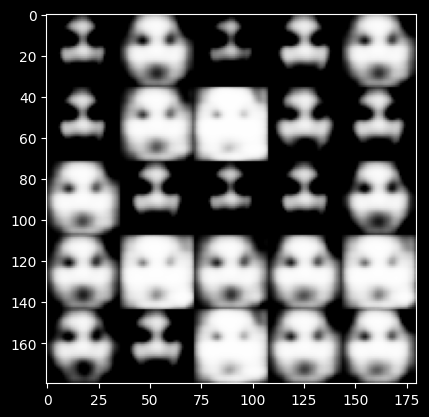

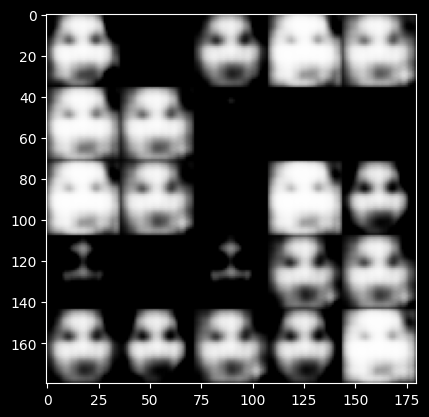

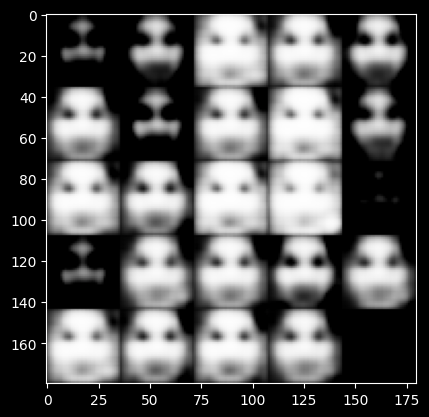

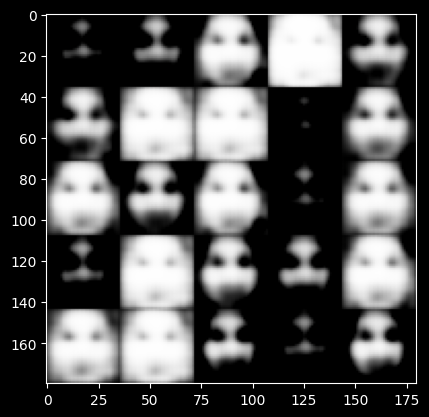

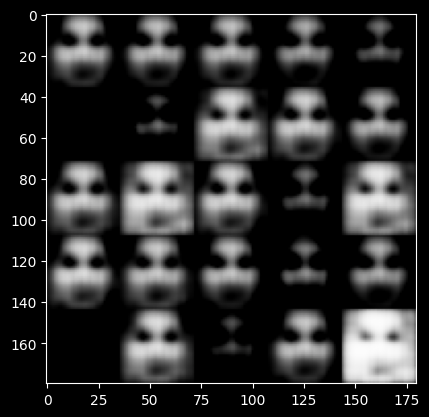

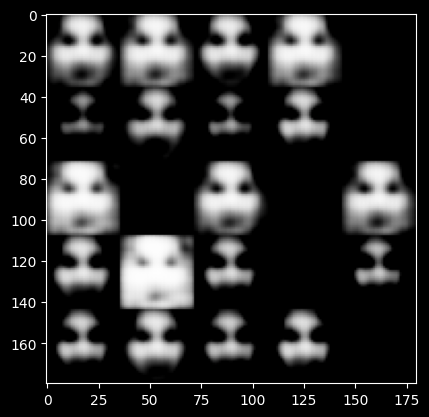

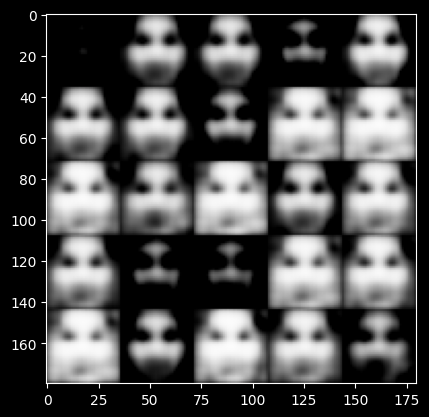

In [17]:
Ae_model.train(run_folder="C:\\Users\\1\\Desktop\\PersonalFriendProject\\run_folder", train_tensor=train_tensor_std, batch_size=32, epochs=100, epoch_per_save=10)

In [13]:
encoded_points = Ae_model.encoder.predict(test_tensor_std)
decoded_images = Ae_model.decoder.predict(encoded_points)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


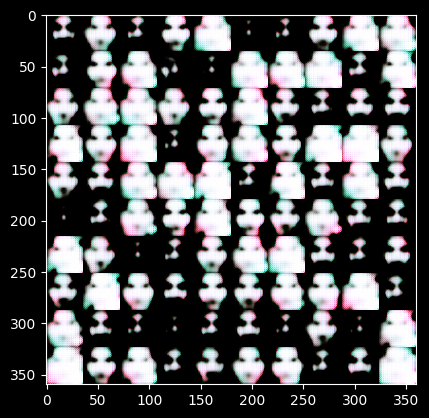

In [14]:
show_samples(samples_number=100, data_tensor=decoded_images)

In [15]:
fig, axis = plt.subplots()
axis.
